## Evaluating Methodology 2 (Artificial Neural Networks) (LSTM)

### Packages

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

### Functions

### Get dataset

In [2]:
df_diff = pd.read_csv('../../assets/df_diff.csv', index_col=0)
# example of read_csv on google drive
# df_diff = pd.read_csv('/content/drive/MyDrive/Empresas/ZRP/Desafio Técnico/zrp_case-main/assets/df_diff.csv')
# model = keras.models.load_model('/content/drive/MyDrive/Empresas/ZRP/Desafio Técnico/zrp_case-main/assets/model')

### Preparing dataset (split, scaling and numpy array conversion)

In [3]:
# Separete features and labels
df_m2 = df_diff.copy()
df_m2.drop(columns=['mean'], inplace=True)
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [4]:
# normalize features
ss = MinMaxScaler(feature_range=(0, 1))
X = ss.fit_transform(X)

In [5]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=52)  # 80% train

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=52)  # 10% val, 10% testc

In [6]:
# convert X_train to LSTM model input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

In [7]:
X_train.shape

(2812, 1, 13)

### LSTM Declaration

In [8]:
# create the model
model = Sequential()
# Input shape has to be of type (None, timestemps, num_features)
model.add(Input(shape= X_train.shape[1:], name='input'))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               276480    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 309,505
Trainable params: 309,505
Non-trainable params: 0
_________________________________________________________________
None


### LSTM Training

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
88/88 [==============================] - 4s 17ms/step - loss: 0.6846 - accuracy: 0.5672 - val_loss: 0.6761 - val_accuracy: 0.6467
Epoch 2/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6769 - accuracy: 0.5843 - val_loss: 0.6688 - val_accuracy: 0.6496
Epoch 3/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6689 - accuracy: 0.5871 - val_loss: 0.6616 - val_accuracy: 0.6097
Epoch 4/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6636 - accuracy: 0.5953 - val_loss: 0.6616 - val_accuracy: 0.5897
Epoch 5/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6642 - accuracy: 0.5893 - val_loss: 0.6531 - val_accuracy: 0.6296
Epoch 6/50
88/88 [==============================] - 1s 8ms/step - loss: 0.6605 - accuracy: 0.5939 - val_loss: 0.6502 - val_accuracy: 0.6325
Epoch 7/50
88/88 [==============================] - 1s 9ms/step - loss: 0.6595 - accuracy: 0.5878 - val_loss: 0.6469 - val_accuracy: 0.6467
Epoch 8/50
88/88 [=

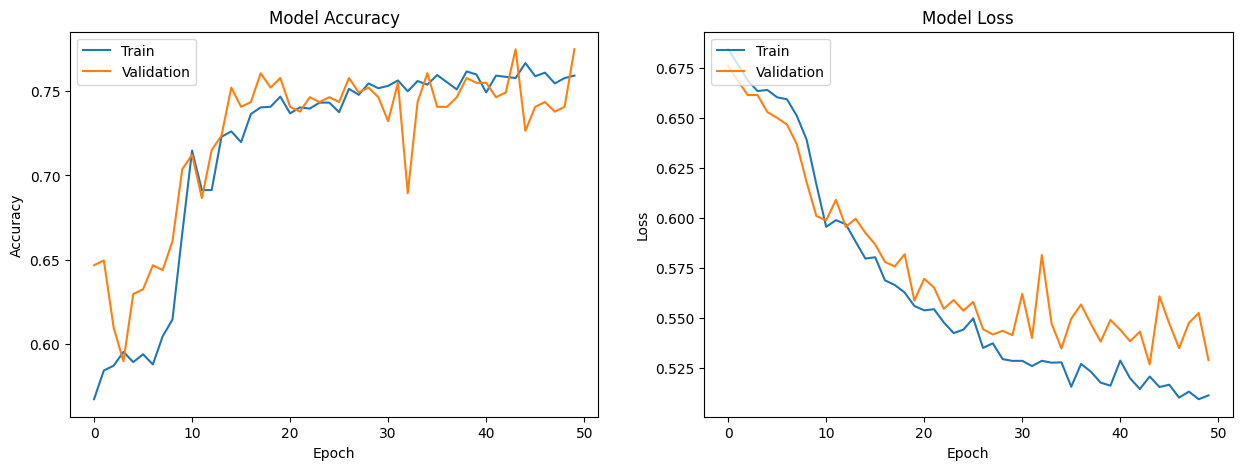

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Notes**
**The Model Accuracy** figure tells us that the model had sucess on training. With no overfitting
**The Model Loss** figure tells us that the loss decreases while the model was training. Good results too.

### Export model for the prediction on test data at `apply_rnn_model.ipynb`

In [11]:
model.save('../../assets/model')

INFO:tensorflow:Assets written to: ../../assets/model\assets


INFO:tensorflow:Assets written to: ../../assets/model\assets
